In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Needed Constants

In [25]:
M_Cs137,  Lamb_Cs137,  D_water_Cs137, Y_Cs137 = 137, np.log(2)/(30*365*3600*24), 2.056e-9, 0.059#9e-10#6e-12 #2.056e-9#6e-12

# Class for Release Rate

In [58]:
import numpy as np
import matplotlib.pyplot as plt

class ReleaseRateCalculation:
    def __init__(self, M_Isotope, Lamb, T_gas):
        self.M_Isotope = M_Isotope       # Isotope mass
        self.Lamb = Lamb                 # Decay constant
        self.T_gas = T_gas
    

    def Finite_difference_scheme_gasses(self, M, N, Lamb, D, steady_concentration, Defect_Depth):
        R = 8.314e-3                                     # Gas constant in kJ/(mol*K)
        L = 0.00038 - Defect_Depth                                      # Cladding thickness
        M_gas = M
        A = 1.5e-8
        N_total = N     # Total number of spatial steps

        dx = L / N_total                           # Spatial step size
        dt = self.T_gas / M_gas                           # Time step size


        u = np.zeros((N+1, M+1))
        u[0, :] = steady_concentration 

        R_t = np.zeros(M+1)

        x = np.linspace(0, L, N+1)

        for j in range(M):
            for i in range(1, N):
                # Check the stability condition within the loop after D is calculated
                #if D * dt / dx**2 > 0.5:
                    # Possible values for N and M to satisfy the stability condition
                    #N_option1, M_option1 = int(D * self.T_gas / dx**2 * 2), M
                    #N_option2, M_option2 = N, int(D * self.T_gas / dx**2 * 2)
                    #N_option3, M_option3 = int(D * self.T_gas / dx**2), int(D * self.T_gas / dx**2)
                    #print(f"Stability condition not satisfied. Change N or M to such that it is met. "
                    #      f"Examples that are possible with this diffusion coefficient are: "
                    #      f"N={N_option1}, M={M_option1}; "
                    #      f"N={N_option2}, M={M_option2}; "
                    #      f"N={N_option3}, M={M_option3}")
                    #return
                
                u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - self.Lamb * dt * u[i, j]
            
            u[0, j+1] = u[0, j]

            u[N, j+1] = u[N, j] + D * dt / dx * (u[N-1, j] - u[N, j]) - self.Lamb * u[N, j]

            dc_dx = (u[N-1, j] - u[N, j]) / dx
            J = -D * dc_dx
            R_t[j+1] = -J * A
            
        return u, R_t[-1]

def Exp_measurement_50mL_Sample(Lamb, release, sample_size, volume, time):
    return Lamb * release * time * sample_size / volume *0.839 *3600


# Constants

In [79]:
# Importing the diffusion coefficients
Estimated_Diff_Coeff_I = 7.384962008822793e-15
Defect_Depth = 0.0001
T_gas = 365*4*24*3600 #4 Years

sample_size = 50e-6    #m3
volume      = 0.065     #m3
time        = 5*60  #s



# Calculation

In [80]:
# Varying defect depths from 0 to the original Lamb_Cs137
L = 0.00038
defect_depths = np.linspace(0, 0.00024, 50)
Cs137_meas_values = []

N=10
M=10000

for Defect_Depth in defect_depths:
    Cs137 = ReleaseRateCalculation(M_Cs137, Lamb_Cs137, T_gas)
    _, release_rate = Cs137.Finite_difference_scheme_gasses(M, N, Lamb_Cs137, Estimated_Diff_Coeff_I, steady_concentration, Defect_Depth)
  
    Cs137_meas = Exp_measurement_50mL_Sample(Lamb_Cs137, release_rate, sample_size, volume, time)
    Cs137_meas_values.append(Cs137_meas)



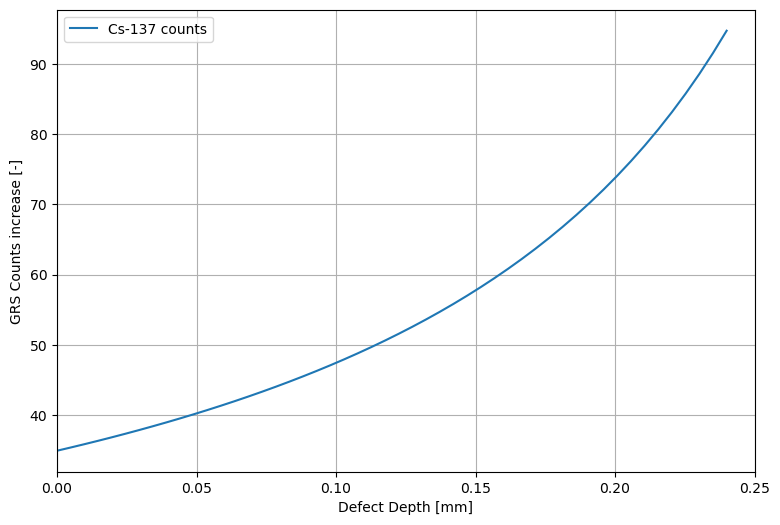

In [81]:
# Plotting
plt.figure(figsize=[9,6])
plt.plot(defect_depths*1000, Cs137_meas_values, label='Cs-137 counts')
plt.xlabel('Defect Depth [mm]')
plt.ylabel('GRS Counts increase [-]')
#plt.title('Cs137_meas vs Defect Depth')
plt.grid()
plt.legend()
plt.xlim(0,0.25)
plt.show()